In [1]:
# Import the necessary packages & libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

# Load the data set into the pandas data frame by using read_csv command
df = pd.read_csv(r'C:\Users\ashle\Downloads\D212\churn_clean.csv', keep_default_na=False)

In [2]:
# Explore the dataset in order to determine how to evaluate the input data by using the head() command
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Print the summary statistics for the continuous variables
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Area','TimeZone','Job','Children','Age','Income','Marital','Gender','Churn',
           'Techie','Contract','Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod',
           'Item1','Item2','Item3', 'Item4','Item5','Item6','Item7','Item8']
df.drop(columns=to_drop,inplace=True)

# Print column names to see what columns are left
print(df.columns)

Index(['Population', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')


In [6]:
# Normalize the data by using standardization
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_df.head()

,Population,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [7]:
# Save to new file 
scaled_df.to_csv('D212_Task2.csv')

In [8]:
# Set the size of Principal Components (PCs)
pca = PCA(n_components=scaled_df.shape[1])
pca.fit_transform(scaled_df)

array([[-1.51892308, -1.60028534, -0.4523488 , ...,  0.08091597,
        -0.33172014, -0.06471949],
       [-1.64726761,  0.19569971, -1.16985152, ..., -0.05424105,
        -0.59376954, -0.02164869],
       [-0.90873505, -1.33573398, -0.77372642, ..., -0.1390508 ,
         0.44955339,  0.08152433],
       ...,
       [ 0.58521805, -1.2654814 ,  0.38099736, ..., -0.46821967,
         0.06014122, -0.09310407],
       [ 2.0154624 ,  2.21370971,  0.19807666, ..., -1.03924796,
        -0.59469242, -0.06499388],
       [ 1.56615756,  1.73520578,  0.35112647, ...,  0.74056348,
        -0.15772066, -0.01868389]])

In [9]:
# Generate the PCA loading matrix, the variables that contribute the most to the PCs
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
                        index=scaled_df.columns)

# Print the loading matrix 
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population,-0.005903,0.344915,0.450352,0.499984,-0.274235,-0.577916,-0.137865,0.000027
Outage_sec_perweek,0.005890,0.474455,-0.469356,0.279187,-0.215157,0.106576,0.647277,0.000048
Email,-0.020914,0.457599,0.472623,-0.069708,-0.196284,0.708907,-0.144422,0.000188
Contacts,0.004417,0.392605,-0.199278,0.314783,0.775157,0.059891,-0.320292,-0.000152
Yearly_equip_failure,0.017454,-0.366576,-0.310883,0.624915,-0.336207,0.332706,-0.392966,-0.000056
Tenure,0.705576,-0.014578,0.043649,0.016768,0.020054,0.015216,0.032897,-0.705725
MonthlyCharge,0.040592,0.397095,-0.463750,-0.420975,-0.354491,-0.193875,-0.532048,-0.045358
Bandwidth_GB_Year,0.706883,0.010812,0.013639,-0.010173,-0.002508,0.002616,-0.001397,0.707033


In [10]:
# Calculate the covariance and vectors then define the eigenvalues
cov_matrix = np.dot(scaled_df.T, scaled_df) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

print(cov_matrix)

[[ 1.          0.00548327  0.01796155  0.00401876 -0.0044829  -0.00355944
  -0.00477827 -0.00390183]
 [ 0.00548327  1.          0.00399373  0.01509168  0.00290873  0.00293196
   0.02049607  0.00417566]
 [ 0.01796155  0.00399373  1.          0.00304036 -0.01635434 -0.01446788
   0.00199655 -0.01457915]
 [ 0.00401876  0.01509168  0.00304036  1.         -0.00603225  0.00282009
   0.00425865  0.00329872]
 [-0.0044829   0.00290873 -0.01635434 -0.00603225  1.          0.01243491
  -0.00717228  0.01203369]
 [-0.00355944  0.00293196 -0.01446788  0.00282009  0.01243491  1.
  -0.00333681  0.99149519]
 [-0.00477827  0.02049607  0.00199655  0.00425865 -0.00717228 -0.00333681
   1.          0.06040643]
 [-0.00390183  0.00417566 -0.01457915  0.00329872  0.01203369  0.99149519
   0.06040643  1.        ]]


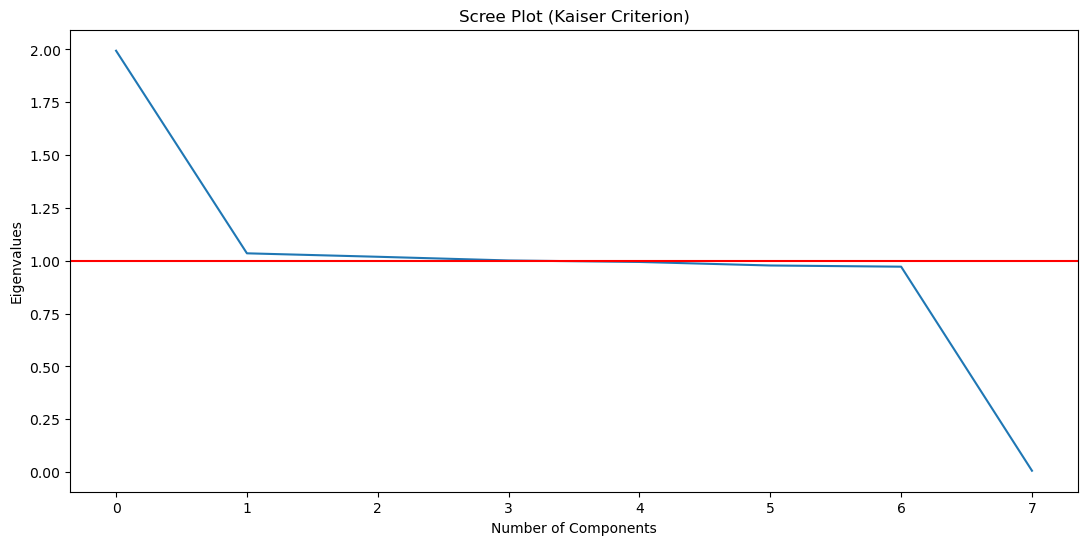

In [11]:
# Create a scree plot to identify which PCs to keep 
plt.figure(figsize = [13,6])
plt.plot(eigenvalues)
plt.title('Scree Plot (Kaiser Criterion)')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [12]:
# Print the eigenvalues to ensure the number of PCs to keep (values greater than 1)
eigenvalues

[1.993947711170649,
 1.0352380857299903,
 1.0189087404723427,
 1.0014679192636669,
 0.9943505278790467,
 0.9776288051387271,
 0.9719999630069427,
 0.00645824733863722]

In [13]:
# Get the explaine variance per principal component as percentages
captured_variance = pca.explained_variance_ratio_ * 100

# Print the captured variance for each component
for i, var in enumerate(captured_variance):
    print(f"Principal Component {i+1}: {var:.2f}%")

Principal Component 1: 24.92%
Principal Component 2: 12.94%
Principal Component 3: 12.74%
Principal Component 4: 12.52%
Principal Component 5: 12.43%
Principal Component 6: 12.22%
Principal Component 7: 12.15%
Principal Component 8: 0.08%


In [14]:
# Print the total variance captured by the PCs
total_variance_captured = np.sum(pca.explained_variance_ratio_[:4])
total_variance_captured

0.631195307079581